# Regression

The linear problems we have learned so far are all balanced or square system, in which the number of equations equals the number of unknowns. However, in the real cases, overdetermined linear systems are much more common: we almost always take more measurements than the unknowns in order to reduce the effect of noises. How can we solve a overdetermined system?

## Linear Least Square Regression

Consider an overdetermined linear system $A x = b$, where $A$ is a $n \times m$ rectangular matrix, where $n > m$. We also require $A$ to be full rank. Due to the error in the measurement $b$, in most cases there are no $x$ existing that fully satisfies all the equations in the system. 

To solve the problem, we need to find a $x$ that minimize the error between the model prediction ($Ax$) and measurement ($b$), which can be presented by a column vector as:
$$ e = Ax - b $$

The most common way to solve $x$ is to minimize L-2 norm of the error vector $e$, which is defined as:
$$
E = \sum_{i=1}^{m} e_i^2 = e^T e
$$
where $e^T$ is the transpose of $e$. 

By substituting $e = Ax-b$, we have
$$
E = e^Te = (Ax-b)^T(Ax-b) = x^TA^TAx - b^TAx - x^TA^Tb + b^Tb = x^TA^TAx - 2x^TA^Tb + b^Tb
$$
To find $x$ that minimizes $E$, we set the derivatives of $E$ with respect to $x$ to zero:
$$
\frac{\partial E}{\partial x} = -2 A^Tb + 2A^T A x = 0
$$
which gives us one of the **normal equations**:
$$
A^T A x = A^T b \\
A^\dagger x=b^\dagger
$$
This brings us back the problem we have learned in the last section, where $A^\dagger = A^TA$ is a full-rank square matrix, $b^\dagger = A^T b$ is a column vector. 

### Exercise
By knowing the following matrix differentiation rules, please prove the normal equations. 
$$
\alpha = A x  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = A
$$
$$
\alpha = x^T A  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = A^T
$$
$$
\alpha = x^T A x  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = x^T \left(A + A^T \right)
$$
The proof of the matrix differentiation rules can be found [here](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf).

## 1-D Linear Regression: Fitting a Straight Line

Two variables $\alpha$ and $\beta$ that we know are linearly related, which can be presented as
$$
\beta = c_1 \alpha + c_0
$$
where $a$ and $b$ are the unknown constant to be determined. By taking a series of measurements, we have $n$ data points $(\alpha_1,\beta_1), (\alpha_2,\beta_2),..., (\alpha_n,\beta_n)$. The goal is to find the optimized $a$ and $b$ such that the error
$$
\varepsilon^2 = \sum_{i=1}^{n} \left( c_1\alpha_i + c_0 - \beta_i \right)^2
$$
is minimized.

This problem is equivalent to the least-square problem we just discussed, if we rewrite the problem in the matrix form as:
$$
e = 
\left[
\begin{matrix}
\alpha_1 & 1 \\
\alpha_2 & 1 \\
\vdots & \vdots \\
\alpha_n & 1 
\end{matrix}
\right]
\left[
\begin{matrix}
c_1 \\
c_0
\end{matrix}
\right]
- 
\left[
\begin{matrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{matrix}
\right]
$$
and by minimizing $e^Te$ we have
$$
A^T A x = A^T b
$$
where
$$
A = 
\left[
\begin{matrix}
\alpha_1 & 1 \\
\alpha_2 & 1 \\
\vdots & \vdots \\
\alpha_n & 1 
\end{matrix}
\right], \ \ \ \ \ 
x = 
\left[
\begin{matrix}
c_1 \\
c_0
\end{matrix}
\right], \ \ \ \ \ 
b = 
\left[
\begin{matrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{matrix}
\right]
$$

$c_0$ and $c_1$ can be solved by
$$
\left[ \begin{matrix}
c_1 \\ c_0
\end{matrix} \right]
= \left(A^TA\right)^{-1}A^T b
$$

True answer: c_1:0.5,c_0:3.4
Inverted answer: c_1:0.50,c_0:3.43


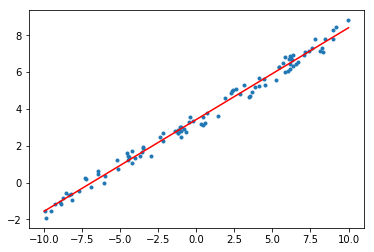

In [122]:
# python program to perform a 1-D linear inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c1 = 0.5; c0 = 3.4;
noise_level = 1
true_fun = lambda x: c1*x+c0

# generate the data
x = (np.random.rand(100)-0.5)*20
y = true_fun(x)
y += noise_level*(np.random.rand(100)-0.5) # add noise to data

# perform least-square fitting
A = np.hstack((x.reshape(-1,1),np.ones(len(x)).reshape(-1,1)))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# print out the result
print('True answer: c_1:{},c_0:{}'.format(c1,c0))
print('Inverted answer: c_1:{:.2f},c_0:{:.2f}'.format(para[0],para[1]))


predict_x = np.array([-10,10])
predict_y = para[0]*predict_x+para[1]

plt.figure()
plt.plot(x,y,'.')
plt.plot(predict_x,predict_y,'r')
plt.show()

## 1-D Polynomial Curve Fitting
It makes sense that we can use linear least square method to solve a linear function problem, but what if the variables $\alpha$ and $\beta$ are not related linearly, but through a $m^{th}$-order polynomial function?
$$
\beta = c_m \alpha^m + c_{m-1} \alpha^{m-1} + ... + c_1 \alpha + c_0
$$
It turns out that we can use the exact same setting as the linear equation, by forming matrix and vectors:
$$
A = 
\left[ \begin{matrix}
\alpha_1^m & \alpha_1^{m-1} & ... & \alpha_1 & 1 \\
\alpha_2^m & \alpha_2^{m-1} & ... & \alpha_2 & 1 \\
\vdots & \vdots & ... & \vdots & \vdots \\
\alpha_n^m & \alpha_n^{m-1} & ... & \alpha_n & 1 \\
\end{matrix} \right], \ \ \ \ \ 
x = 
\left[ \begin{matrix}
c_m \\ c_{m-1} \\ \vdots \\ c_0
\end{matrix} \right], \ \ \ \ \ 
b = 
\left[ \begin{matrix}
\beta_m \\ \beta_{m-1} \\ \vdots \\ \beta_0
\end{matrix} \right], \ \ \ \ \ 
$$
same as above, the coefficients $c_0,c_1,...,c_m$ can be solved by:
$$
\left[ \begin{matrix}
c_m \\ c_{m-1} \\ ... \\ c_0
\end{matrix} \right]
= \left(A^TA\right)^{-1}A^T b
$$

True answer:  [1, 2, 3, 4, 5]
Inverted answer:  [1.66192661 2.04274451 2.3646478  3.91943626 5.10371882]


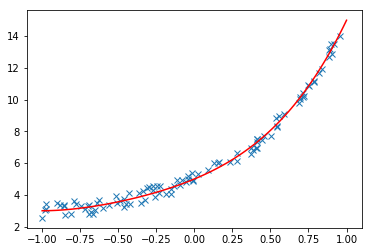

In [121]:
# python program to perform a 1-D linear inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c = [1,2,3,4,5]
noise_level = 1
true_fun = lambda x: np.polyval(c,x)

# generate the data
x = (np.random.rand(100)-0.5)*2
y = true_fun(x)
y += noise_level*(np.random.rand(100)-0.5) # add noise to data

# perform least-square fitting
A = np.ones((len(x))).reshape(-1,1)
for i in range(1,len(c)):
    A = np.hstack((x.reshape(-1,1)**i,A))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# print out the result
print('True answer: ',c)
print('Inverted answer: ',para)

predict_x = np.linspace(-1,1,100)
predict_y = np.polyval(c,predict_x)

plt.figure()
plt.plot(x,y,'x')
plt.plot(predict_x,predict_y,'r')
plt.show()

## 2-D Polynomial Surface Fitting

The same idea applies to higher dimension problems. Say variable $\gamma$ is depended on variables $\alpha$ and $\beta$ through a 2-D 2nd-order polynomial function
$$
\gamma = c_0 + c_1\alpha + c_2 \alpha^2 + c_3 \alpha \beta + c_4 \beta + c_5 \beta^2 
$$
we can again form the linear equation set $Ax$ with
$$
A = 
\left[ \begin{matrix}
\beta_1^2 & \beta_1 & \alpha_1\beta_1 &\alpha_1^2 &\alpha_1 & 1 \\
\beta_2^2 & \beta_2 & \alpha_2\beta_2 &\alpha_2^2 &\alpha_2 & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\beta_n^2 & \beta_n & \alpha_n\beta_n &\alpha_n^2 &\alpha_n & 1
\end{matrix} \right], \ \ \ \ \ \ 
x = 
\left[ \begin{matrix}
c_5 \\ c_4 \\ c_3 \\ c_2 \\ c_1 \\ c_0  
\end{matrix} \right] 
$$
and solve it using least square method.